In [ ]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**About Bellabeat**

Bellabeat, a tech company specializing in health products designed for women, has seen success as a small business but has the potential to expand significantly in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer, believes that leveraging fitness data from smart devices could open up new avenues for growth.


**Questions for the analysis**

1. What are the current trends in smart device usage?
2. How might these trends be relevant to Bellabeat's customer base?
3. How could these trends influence Bellabeat's marketing strategy?



**Business task**

Identify growth opportunities and recommend enhancements to Bellabeat's marketing strategy by capitalizing on emerging trends in smart device usage.

In [7]:
library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(tidyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


**Data and Importing Data: **

I will use the FitBit Fitness Tracker [Data](http://www.kaggle.com/datasets/arashnic/fitbit).  Version 4.12.16

In [4]:
activity <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv") 
calories <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
intensities <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
sleep <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

First check the .csv files in excel and then scan the dataframes using View and head/tail etc. 


In [5]:
head(activity)
head(calories)
head(intensities)
head(sleep)
head(weight)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,Id,ActivityHour,Calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,81
2,1503960366,4/12/2016 1:00:00 AM,61
3,1503960366,4/12/2016 2:00:00 AM,59
4,1503960366,4/12/2016 3:00:00 AM,47
5,1503960366,4/12/2016 4:00:00 AM,48
6,1503960366,4/12/2016 5:00:00 AM,48


,Id,ActivityHour,TotalIntensity,AverageIntensity
,<dbl>,<chr>,<int>,<dbl>
1,1503960366,4/12/2016 12:00:00 AM,20,0.333333
2,1503960366,4/12/2016 1:00:00 AM,8,0.133333
3,1503960366,4/12/2016 2:00:00 AM,7,0.116667
4,1503960366,4/12/2016 3:00:00 AM,0,0.000000
5,1503960366,4/12/2016 4:00:00 AM,0,0.000000
6,1503960366,4/12/2016 5:00:00 AM,0,0.000000


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,True,1.460938e+12


I noticed some issues with the timestamp data. Before proceeding with the analysis, I'll need to convert it to date-time format and then separate it into date and time.  Based on the earlier scan I'd wanted to explore the day-of-week wise comparisons and so the day of week needs to be extrapolated and columns added. 

**Day of Week will used to analyze the outputs**

# Fixing formatting

In [8]:
# a) Change ActivityHour into Date-Time format - need to extrapolate day of week from the date-time format

intensities$ActivityHour=as.POSIXct(intensities$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
# split date and day of week 

intensities$date <- format(intensities$ActivityHour, format = "%m/%d/%Y")
date <- as.Date(intensities$date, format = "%m/%d/%Y")
intensities$day <- wday(date, label = TRUE, abbr=FALSE)


# b) do the same formatting for calories, activity and sleep dataframes 

calories$ActivityHour = as.POSIXct(calories$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
calories$date <- format(calories$ActivityHour, format = "%m/%d/%y")
date_calories <- as.Date(calories$date, format = "%m/%d/%Y")
calories$day <- wday(date_calories, label = TRUE, abbr=FALSE)

# activity
activity$ActivityDate = as.POSIXct(activity$ActivityDate, format = "%m/%d/%Y", tz=Sys.timezone())
activity$date <- format(activity$ActivityDate, format = "%m/%d/%y")
date_activity <- as.Date(activity$date, format = "%m/%d/%Y")
activity$day <- wday(date_activity, label = TRUE, abbr=FALSE)


# sleep
sleep$SleepDay=as.POSIXct(sleep$SleepDay, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
sleep$date <- format(sleep$SleepDay, format = "%m/%d/%y")
date_sleep <- as.Date(sleep$date, format = "%m/%d/%Y")
sleep$day <- wday(date_sleep, label = TRUE, abbr=FALSE)

Now that everything is ready, I can start exploring data sets. Start by checking unique observation in each dataframe. 

# Exploring and summarizing data

In [9]:
n_distinct(activity$Id)
n_distinct(calories$Id)
n_distinct(intensities$Id)
n_distinct(sleep$Id)
n_distinct(weight$Id)

[1] 33

[1] 33

[1] 33

[1] 24

[1] 8

This information provides an overview of the number of participants in each dataset.

There are 33 participants in the activity, calories, and intensities datasets, 24 in the sleep dataset, and only 8 in the weight dataset. With just 8 participants, the weight data is insufficient for making any reliable recommendations or conclusions.

Now, let’s examine the summary statistics of the datasets. 

In [10]:
# Generate a summary analysis of each of the dataframes

# activity

activity %>% 
  select(TotalSteps, 
         TotalDistance,
         SedentaryMinutes, Calories) %>% 
  summary()

# explore num of active minutes per category
activity %>%
  select(VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes) %>%
  summary()

#intensity 

intensities %>% 
  select(TotalIntensity, AverageIntensity) %>% 
  summary()

# calories
calories %>% 
  select(Calories) %>% 
  summary()

# sleep
sleep %>%
  select(TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed) %>%
  summary() 

# weight
weight %>% 
  select(WeightKg, BMI) %>% 
  summary()

   TotalSteps    TotalDistance    SedentaryMinutes    Calories   
 Min.   :    0   Min.   : 0.000   Min.   :   0.0   Min.   :   0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8   1st Qu.:1828  
 Median : 7406   Median : 5.245   Median :1057.5   Median :2134  
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2   Mean   :2304  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5   3rd Qu.:2793  
 Max.   :36019   Max.   :28.030   Max.   :1440.0   Max.   :4900  

 VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes
 Min.   :  0.00    Min.   :  0.00      Min.   :  0.0       
 1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:127.0       
 Median :  4.00    Median :  6.00      Median :199.0       
 Mean   : 21.16    Mean   : 13.56      Mean   :192.8       
 3rd Qu.: 32.00    3rd Qu.: 19.00      3rd Qu.:264.0       
 Max.   :210.00    Max.   :143.00      Max.   :518.0       

 TotalIntensity   AverageIntensity
 Min.   :  0.00   Min.   :0.0000  
 1st Qu.:  0.00   1st Qu.:0.0000  
 Median :  3.00   Median :0.0500  
 Mean   : 12.04   Mean   :0.2006  
 3rd Qu.: 16.00   3rd Qu.:0.2667  
 Max.   :180.00   Max.   :3.0000  

    Calories     
 Min.   : 42.00  
 1st Qu.: 63.00  
 Median : 83.00  
 Mean   : 97.39  
 3rd Qu.:108.00  
 Max.   :948.00  

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.000     Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.000     1st Qu.:361.0      1st Qu.:403.0  
 Median :1.000     Median :433.0      Median :463.0  
 Mean   :1.119     Mean   :419.5      Mean   :458.6  
 3rd Qu.:1.000     3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.000     Max.   :796.0      Max.   :961.0  

    WeightKg           BMI       
 Min.   : 52.60   Min.   :21.45  
 1st Qu.: 61.40   1st Qu.:23.96  
 Median : 62.50   Median :24.39  
 Mean   : 72.04   Mean   :25.19  
 3rd Qu.: 85.05   3rd Qu.:25.56  
 Max.   :133.50   Max.   :47.54  

**Notable discoveries:

*Average intense activity per day is 12 minutes - should be higher.*

*Most people are on the less active side.
*
On average, people sleep just under 7 hours per day.

*18.5 - 24.9 is the healthy BMI range - most in the weight dataset fall outside this range (although weight dataset has few observations)

*CDC recommends 8-10,000 steps a day to help reduce mortality risk. It also recommends 20 minutes of intense activity per day. 7,638 steps in our dataset are lower than what is recommended.

We will observe how active individuals are during the days of the week.  We can look at the activity level, intensity, calorie burn and sleep data through the different days of the week and see if Bellabeat can devise a plan based on this.  Day of week columns were added earlier in this exercise. 

In [11]:
# Intensities based on day of the week (DoW)

Intense_DoW <- intensities %>% 
  group_by(day) %>% 
  summarise (mean_of_day = mean(TotalIntensity))


Intense_DoW <- intensities %>% 
  group_by(day) %>% 
  drop_na() %>%
  summarise (AverageIntense = mean(AverageIntensity), TotalIntense = mean(TotalIntensity))

Let's visually observe the results. 

Warning message in geom_histogram(stat = "identity", fill = "blue"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”
Warning message in geom_histogram(stat = "identity", fill = "gray"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


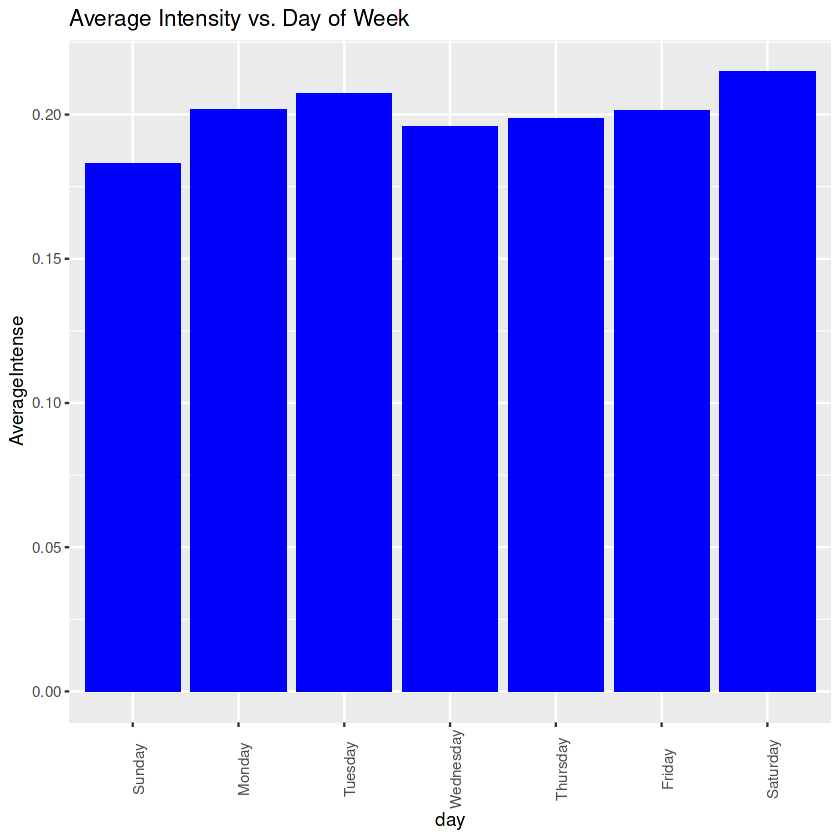

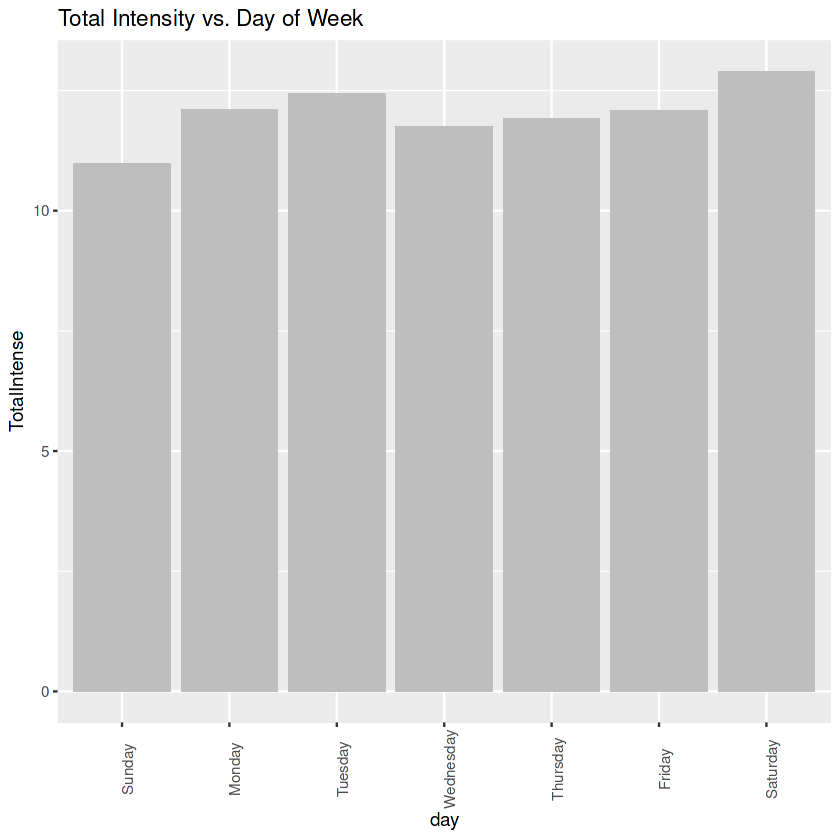

In [12]:
ggplot(data=Intense_DoW, aes(x=day, y=AverageIntense)) + geom_histogram(stat='identity', fill='blue') +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(title="Average Intensity vs. Day of Week")


ggplot(data=Intense_DoW, aes(x=day, y=TotalIntense)) + geom_histogram(stat='identity', fill='gray') +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(title="Total Intensity vs. Day of Week")

* Looking at the histogram, it appears the days with the most intensity are Saturdays and Tuesdays.  

* Let's see if this pattern is consistent with information from the other tables starting with the Activity data


In [13]:
# Activity based on Day of Week (DoW)

Activity_DoW <- activity %>% 
  group_by(day) %>% 
  drop_na() %>%
  summarise(Avg_total_distance = mean(TotalDistance), Avg_total_steps = mean(TotalSteps))

View(Activity_DoW)

day,Avg_total_distance,Avg_total_steps
<ord>,<dbl>,<dbl>
Sunday,5.027190,6933.231
Monday,5.552917,7780.867
Tuesday,5.832237,8125.007
Wednesday,5.488333,7559.373
Thursday,5.312245,7405.837
Friday,5.309921,7448.230
Saturday,5.854677,8152.976


Warning message in geom_histogram(stat = "identity", fill = "blue"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”
Warning message in geom_histogram(stat = "identity", fill = "gray"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


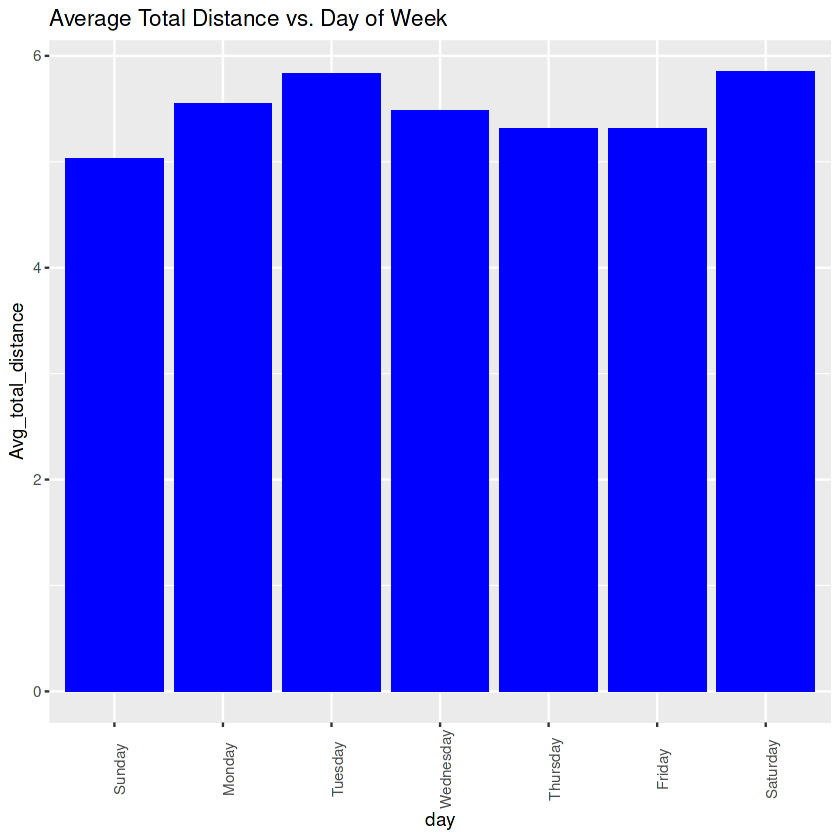

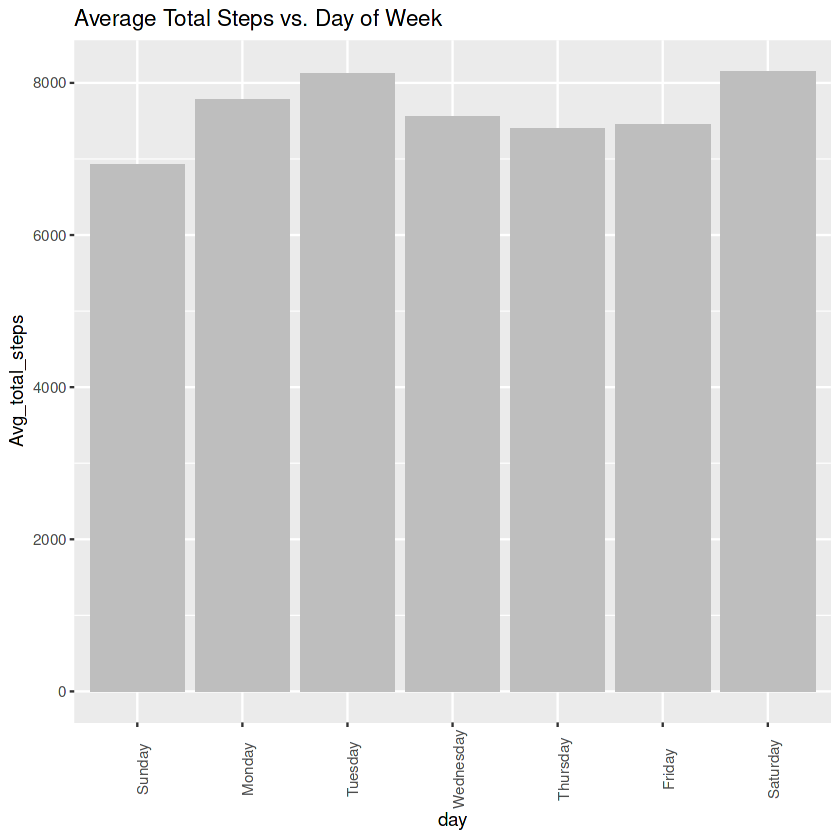

In [14]:
ggplot(data=Activity_DoW, aes(x=day, y=Avg_total_distance)) + geom_histogram(stat='identity', fill='blue') +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(title="Average Total Distance vs. Day of Week")


ggplot(data=Activity_DoW, aes(x=day, y=Avg_total_steps)) + geom_histogram(stat='identity', fill='gray') +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(title="Average Total Steps vs. Day of Week")

Both the average distance and steps indicate a confirmation that Saturdays and Tuesdays are the most active days.

Let's arrange for and visualize the Calorie data.

In [15]:
# Calories based on Day of Week (DoW)

Calories_DoW <- calories %>% 
  group_by(day) %>% 
  drop_na() %>%
  summarise(Avg_calories = mean(Calories))

View(Calories_DoW)

day,Avg_calories
<ord>,<dbl>
Sunday,94.33598
Monday,97.05348
Tuesday,98.61750
Wednesday,96.87426
Thursday,97.00853
Friday,97.78412
Saturday,99.86587


Warning message in geom_histogram(stat = "identity", fill = "blue"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


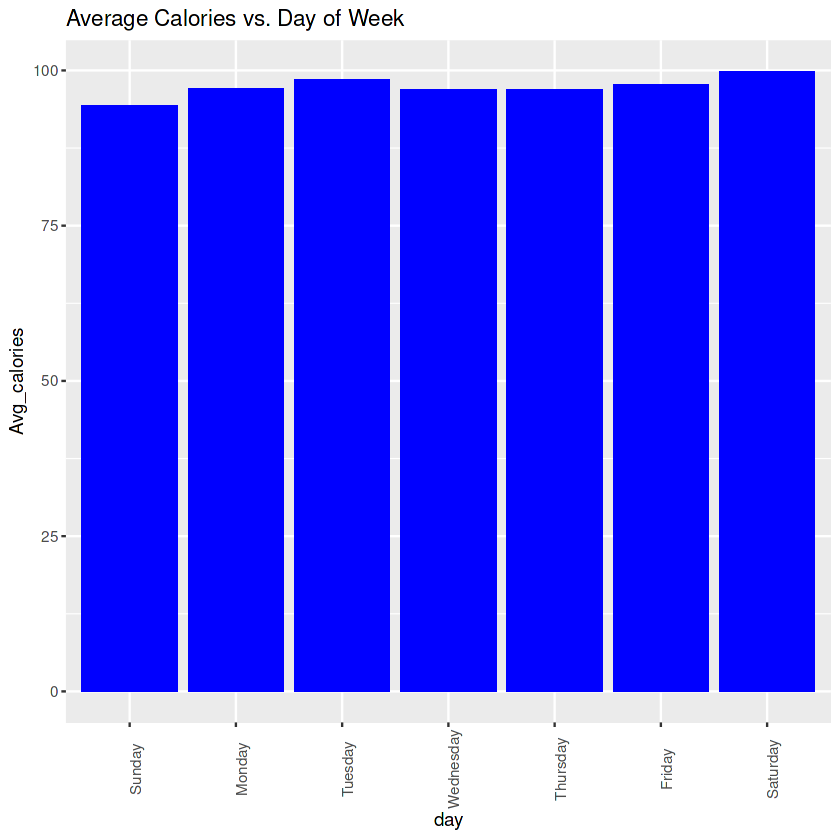

In [16]:
ggplot(data=Calories_DoW, aes(x=day, y=Avg_calories)) + geom_histogram(stat='identity', fill='blue') +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(title="Average Calories vs. Day of Week")

Again, the most calories are burned on Saturday followed by Tuesday.

Finally the Sleep data to see if there is an indication mirroring changes witnessed on Tuesdays and Saturdays.

In [17]:
# Sleep based on Day of Week (DOW)


Sleep_DoW <- sleep %>% 
  group_by(day) %>% 
  drop_na() %>%
  summarise(Avg_total_min_sleep = mean(TotalMinutesAsleep), Avg_total_time_bed = mean(TotalTimeInBed))

View(Sleep_DoW)

day,Avg_total_min_sleep,Avg_total_time_bed
<ord>,<dbl>,<dbl>
Sunday,452.7455,503.5091
Monday,418.8298,456.1702
Tuesday,404.5385,443.2923
Wednesday,434.6818,470.0303
Thursday,402.3692,435.8000
Friday,405.4211,445.0526
Saturday,420.8103,461.2759


Warning message in geom_histogram(stat = "identity", fill = "blue"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”
Warning message in geom_histogram(stat = "identity", fill = "gray"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


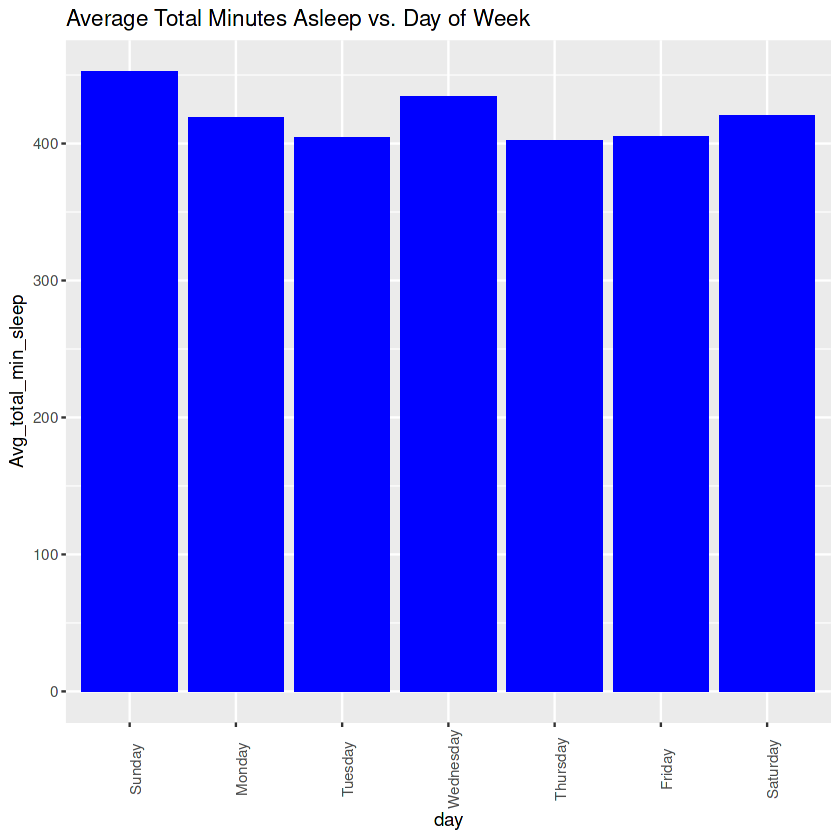

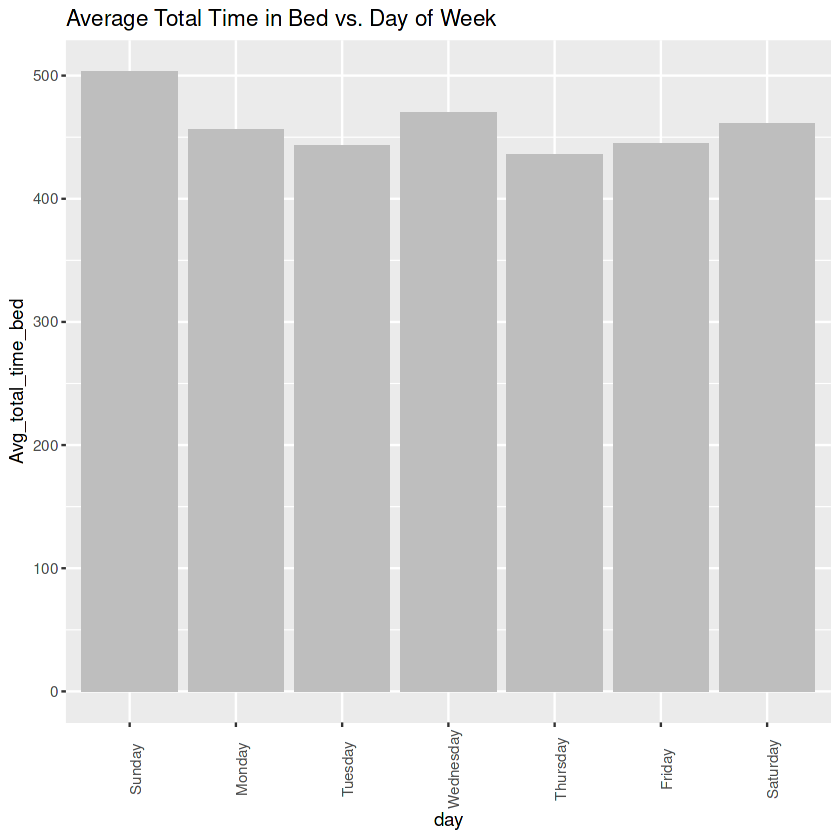

In [18]:
ggplot(data=Sleep_DoW, aes(x=day, y=Avg_total_min_sleep)) + geom_histogram(stat='identity', fill='blue') +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(title="Average Total Minutes Asleep vs. Day of Week")


ggplot(data=Sleep_DoW, aes(x=day, y=Avg_total_time_bed)) + geom_histogram(stat='identity', fill='gray') +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(title="Average Total Time in Bed vs. Day of Week")

While with the Activity, Intensity and Calorie datasets we can see a regular pattern - an behind it may be a correlation - that Saturdays and Tuesdays are the most active days, a larger dataset would be beneficial.

Correlation doesn't mean causation - such as we see in the Sleep data where Sundays have the longest sleep times.

**Summarizing recommendations for the business**

Bellabeat has a defiend target audience and wearables for that audience. The data collected by Bellabeat products can provide insights into the habits and minds of their target audience - the moden working women - so they can help them achieve their goals.

**Following are some insights which could be useful: Campaign messaging:**

The Bellabeat app syncs with your heart and aims to improve it.

**Insights and recommendations**

* 8-10,000 steps a days are recommended by CDC. However, the average user takes fewer than 7,700 steps. Bellabeat app could provide messaging both encouraging the 7,000 steps achieved followed by encouraging individuals to cross the minimum hurdle.

* Based on the limited weight dataset, the Bellabeat app can be used to encourage individuals on what physical steps can be done to come within the range of recommended BMI. The app can define metrics on daily basis based on the individual's body data - weight and BMI
 
* Saturdays and Tuesdays are the most active days. The Bellabeat app could notify with more encouraging notifications on the other days of the week.